# A predictive approach to estimate the maximum voluntary activation of the shoulder muscles

Romain Martinez<sup>*a</sup>, Jonathan Tremblay<sup>a</sup>, Mickael Begon<sup>a</sup>, Fabien Dal Maso<sup>a</sup>

<sup>a</sup>School of Kinesiology and Exercise Science, Faculty of Medicine, University of Montreal

[GitHub repo](https://github.com/romainmartinez/mvc)

# Appendix: demographic data

In [1]:
from pathlib import Path

import pandas as pd
import altair as alt

In [2]:
data_path = Path("./data/demo.csv")

demo_p3 = pd.read_csv(data_path)
demo_p3.head()

,participant,study,sex,mass,height,age
0,sarc,hvsf,w,55.5,170.0,21.0
1,inea,hvsf,w,55.8,167.0,20.0
2,dapo,hvsf,w,61.4,176.0,22.0
3,laug,hvsf,w,66.0,180.0,21.0
4,mara,hvsf,w,56.7,163.0,21.0


In [3]:
shwartz = {
    "n": 13,
    "male": 13,
    "female": 0,
    "age_mean": 25.3,
    "age_std": 3.7,
    "mass_mean": 76.2,
    "mass_std": 11.5,
    "height_mean": 180,
    "height_std": 5,
}

mcdonald = {
    "n": 10,
    "male": 10,
    "female": 0,
    "age_mean": 23.6,
    "age_std": 3.4,
    "mass_mean": 79.4,
    "mass_std": 12.6,
    "height_mean": 179,
    "height_std": 4.8,
}

boettcher = {
    "n": 15,
    "male": 9,
    "female": 6,
    "age_mean": 28.4,
    "age_std": None,
    "mass_mean": None,
    "mass_std": None,
    "height_mean": None,
    "height_std": None,
}

dalmaso = {
    "n": 38,
    "male": 24,
    "female": 14,
    "age_mean": 23.50,
    "age_std": 2.50,
    "mass_mean": 72.25,
    "mass_std": 11.65,
    "height_mean": 180.50,
    "height_std": 10,
}

us = {
    "n": demo_p3.shape[0] + 38,
    "male": demo_p3.query('sex == "m"').shape[0] + 24,
    "female": demo_p3.query('sex == "w"').shape[0] + 14,
    "age_mean": demo_p3["age"].mean(),
    "age_std": demo_p3["age"].std(),
    "mass_mean": demo_p3["mass"].mean(),
    "mass_std": demo_p3["mass"].std(),
    "height_mean": demo_p3["height"].mean(),
    "height_std": demo_p3["height"].std(),
}

In [4]:
d = pd.DataFrame({'P-3': us, 'DM-14': dalmaso, 'Mcdonald': mcdonald, 'Shwartz':shwartz, 'Boettcher': boettcher}).T.reset_index()
d

,index,age_mean,age_std,female,height_mean,height_std,male,mass_mean,mass_std,n
0,P-3,25.669725,6.728952,59.0,174.307087,9.406543,106.0,71.280394,12.548017,165.0
1,DM-14,23.500000,2.500000,14.0,180.500000,10.000000,24.0,72.250000,11.650000,38.0
2,Mcdonald,23.600000,3.400000,0.0,179.000000,4.800000,10.0,79.400000,12.600000,10.0
3,Shwartz,25.300000,3.700000,0.0,180.000000,5.000000,13.0,76.200000,11.500000,13.0
4,Boettcher,28.400000,NaN,6.0,NaN,NaN,9.0,NaN,NaN,15.0


In [32]:
p = alt.Chart().mark_circle(color='grey', size=200).encode(alt.Y("index", title=None))
s = (
    alt.Chart()
    .mark_rule(color='grey', size=3)
    .encode(alt.X("x:Q", scale=alt.Scale(zero=False)), alt.X2("x2:Q"), alt.Y("index"))
)

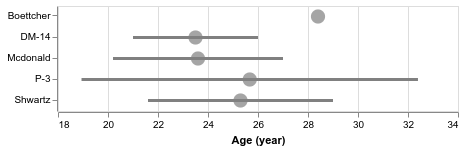

In [33]:
age_p = p.encode(alt.X("age_mean", title="Age (year)"))
age_s = s.transform_calculate(
    x="datum.age_mean - datum.age_std", x2="datum.age_mean + datum.age_std"
)

age = (age_p + age_s).facet(data=d)
age

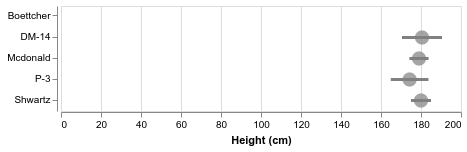

In [37]:
height_p = p.encode(alt.X("height_mean", title="Height (cm)"))
height_s = s.transform_calculate(
    x="datum.height_mean - datum.height_std", x2="datum.height_mean + datum.height_std"
)

height = (height_p + height_s).facet(data=d)
height

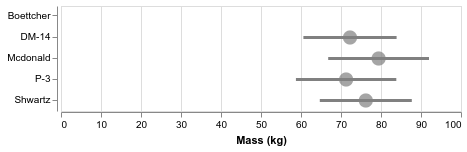

In [20]:
mass_p = p.encode(
    alt.X("mass_mean", title="Mass (kg)", scale=alt.Scale(zero=False))
)
mass_s = s.transform_calculate(
    x="datum.mass_mean - datum.mass_std", x2="datum.mass_mean + datum.mass_std"
)

mass = (mass_p + mass_s).facet(data=d)
mass

In [21]:
sex = d.melt(id_vars='index', value_vars=['female', 'male'])

sex

,index,variable,value
0,P-3,female,59.0
1,DM-14,female,14.0
2,Mcdonald,female,0.0
3,Shwartz,female,0.0
4,Boettcher,female,6.0
5,P-3,male,106.0
6,DM-14,male,24.0
7,Mcdonald,male,10.0
8,Shwartz,male,13.0
9,Boettcher,male,9.0


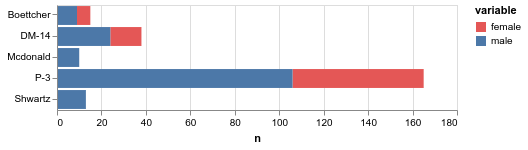

In [22]:
n = d.melt(id_vars="index", value_vars=["female", "male"])

participant = (
    alt.Chart(n)
    .mark_bar()
    .encode(
        alt.Y("index", title=None),
        alt.X("value", title="n"),
        alt.Color(
            "variable",
            scale=alt.Scale(domain=["female", "male"], range=["#e45756", "#4c78a8"]),
        ),
    )
)

participant

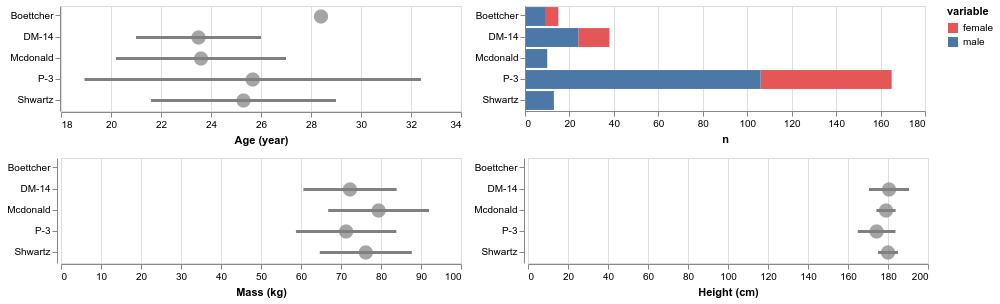

In [23]:
(age | participant) & (mass | height)